## Tasks and Classes


### Sub-task A :-
Sub-task A focus on Hate speech and Offensive language identification offered for English, German, Hindi. Sub-task A is coarse-grained binary classification in which participating system are required to classify tweets into two class, namely: Hate and Offensive (HOF) and Non- Hate and offensive (NOT).

* **(NOT) Non Hate-Offensive** - This post does not contain any Hate speech, offensive content.
* **(HOF) Hate and Offensive** - This post contains Hate, offensive, and profane content.

In our annotation, we label a post as HOF if it contains any form of non-acceptable language such as hate speech, aggression, profanity otherwise NOT.


### Sub-task B :-
Sub-task B is a fine-grained classification. Hate-speech and offensive posts from the sub-task A are further classified into three categories.

* **(HATE) Hate speech** :- Posts under this class contain Hate speech content.
* **(OFFN) Offenive** :- Posts under this class contain offensive content.
* **(PRFN) Profane** :- These posts contain profane words.


#### HATE SPEECH
Describing negative attributes or deficiencies to groups of individuals because they are members of a group (e.g. all poor people are stupid). Hateful comment toward groups because of race, political opinion, sexual orientation, gender, social status, health condition or similar.

#### OFFENSIVE
Posts which are degrading, dehumanizing,insulting an individual,threatening with violent acts are categorized into OFFENSIVE category.

#### PROFANITY
Unacceptable language in the absence of insults and abuse. This typically concerns the usage of swearwords (Scheiße, Fuck etc.) and cursing (Zur Hölle! Verdammt! etc.) are categorized into this category.
We expect most posts to be OTHER, some to be HATE and the other two categories to be less frequent. Dubious cases which are difficult to decide even for humans, should be left out.


### Sub-task C :-
Sub-task c will check the type of offense. Only posts labeled as HOF in sub-task A are included in sub-task C. The two categories in sub-task C are the following: 

* **Targeted Insult (TIN)**: Posts containing an insult/threat to an individual, group, or others.
* **Untargeted (UNT)**: Posts containing nontargeted profanity and swearing. Posts with general profanity are not targeted, but they contain non-acceptable language.
The multilingual HASOC Corpus will be sampled from Facebook and Twitter and distributed in tab separated format. Participants are allowed to use external resources and other datasets for this task. Dataset will be prepared in 3 languages (German, English and code-mixed hindi).

The size of Training data corpus is approximately 8000 posts for each language and Test data is approximately 1000 posts for the each language. Classification systems in all tasks will be evaluated using either macro-averaged F1-score or weighted F1-score.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATHS = {
    "EN": "../data/raw/training_data/english_dataset.tsv",
    "DE": "../data/raw/training_data/german_dataset.tsv",
    "HI": "../data/raw/training_data/hindi_dataset.tsv"
}
DATA_COLUMNS = ["row_id", "text", "task_A", "task_B", "task_C"]
NUM_LANGUAGES = len(DATA_PATHS)

In [3]:
df = pd.read_csv(DATA_PATHS["EN"], sep="\t").fillna("NULL")
df.head()

,text_id,text,task_1,task_2,task_3
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT,NONE,NONE
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF,HATE,TIN
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT,NONE,NONE
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT,NONE,NONE
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT,NONE,NONE


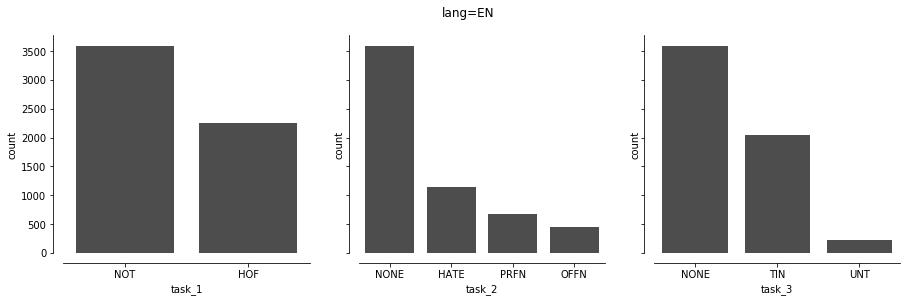

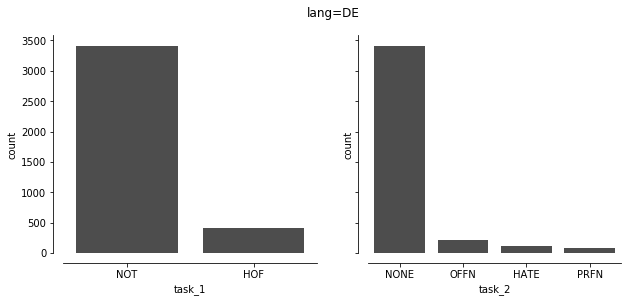

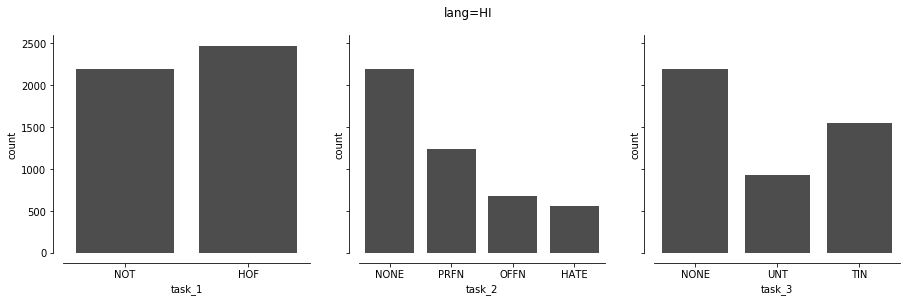

In [4]:
for lang, path in DATA_PATHS.items():
    df = pd.read_csv(path, sep="\t").fillna("NULL")
    task_cols = df.filter(regex=r'task_*', axis=1).columns
    n_cols = len(task_cols)
    fig, ax = plt.subplots(1, n_cols, sharey=True, figsize=(5*n_cols, 4))
    for axi, task in zip(ax.flatten(), task_cols):
        sns.countplot(df[task], ax=axi, color="0.3")
    fig.suptitle(f"lang={lang}")
    sns.despine(offset=10)